In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import ticker
from scipy.stats import sem, ttest_rel
from RZutilpy.figure import bar, plot, default_img_set, colorpalettable
default_img_set()

In [2]:
with open('../Results/Metrics_All_Pre_Post.pkl', 'rb') as f:
    Metrics = pickle.load(f)

In [3]:
df_abs_pre = Metrics["df_abs_tp1"].mean(axis=(1,5))[:,:,0,0]
df_abs_post = Metrics["df_abs_tp2"].mean(axis=(1,5))[:,:,0,0]
variance_pre = Metrics["variance_median_tp1"].mean(axis=(1,5))[:,:,0,0]
variance_post = Metrics["variance_median_tp2"].mean(axis=(1,5))[:,:,0,0]
rotation  = Metrics["rotation_tp1_tp2"].mean(axis=(1,5))[:,:,0,0]

In [4]:
sigstrength_mean = np.vstack((df_abs_pre.mean(axis=(0)),df_abs_post.mean(axis=(0)))).T
sigstrength_se = np.vstack((sem(df_abs_pre, axis=0),sem(df_abs_post, axis=0))).T
variance_mean = np.vstack((variance_pre.mean(axis=(0)),variance_post.mean(axis=(0)))).T
variance_se = np.vstack((sem(variance_pre, axis=0),sem(variance_post, axis=0))).T
rotation_mean = rotation.mean(axis=(0))
rotation_se = sem(rotation, axis=0)

In [11]:
np.set_printoptions(suppress=True)

print(ttest_rel(df_abs_pre, df_abs_post, axis=0, alternative='less'))
print(ttest_rel(variance_pre, variance_post, axis=0, alternative='greater'))

TtestResult(statistic=array([14.06876572,  7.21183554,  0.94297388, -0.39979208, -1.27366852]), pvalue=array([0.99961111, 0.99725191, 0.79236961, 0.35803646, 0.14625198]), df=array([3, 3, 3, 3, 3]))
TtestResult(statistic=array([10.5518701 , 10.96747807, 67.51282693, 17.86143937,  8.30231896]), pvalue=array([0.00090905, 0.00081147, 0.00000358, 0.00019134, 0.00183068]), df=array([3, 3, 3, 3, 3]))


2
2
1


Text(0.5, 0, 'Layer')

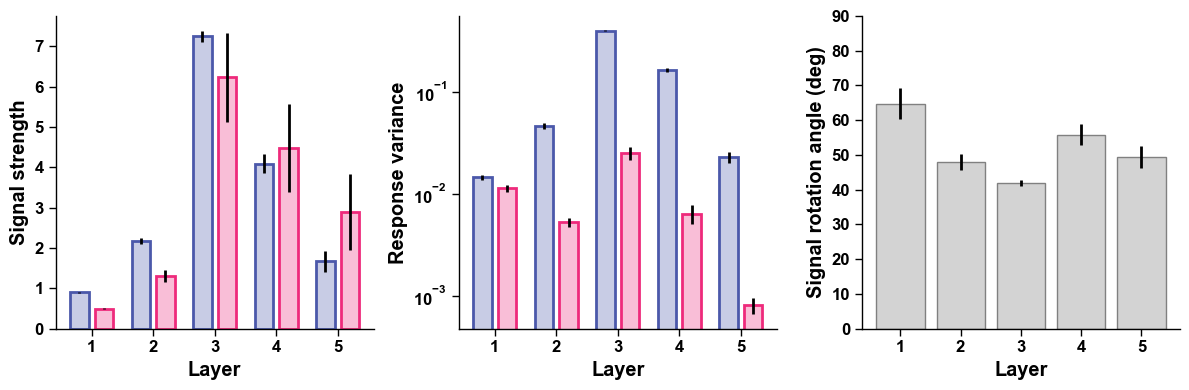

In [6]:
ryzcolor = colorpalettable('ryz1')
C0, C0_alpha = np.array(ryzcolor(0)),np.array(ryzcolor(0))
C1, C1_alpha = np.array(ryzcolor(1)),np.array(ryzcolor(1))
C0_alpha[-1] = 0.3
C1_alpha[-1] = 0.3

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Signal strength
plt.sca(ax[0])
bar(np.arange(1,6,1), sigstrength_mean, yerr=sigstrength_se, ecolor='k', bargap=0.1,width=0.3, edgecolor=[C0, C1], color=[C0_alpha, C1_alpha],linewidth=2)
# ax[0].set_ylim([0, 8])
ax[0].set_xticks([1,2,3,4,5])
ax[0].set_xlabel("Layer")
ax[0].set_ylabel('Signal strength')

# Variance
plt.sca(ax[1])
bar(np.arange(1,6,1), variance_mean, yerr=variance_se, ecolor='k', bargap=0.1,width=0.3,color=[C0_alpha,C1_alpha], edgecolor=[C0, C1],linewidth=2)
ax[1].set_yscale("log")
ax[1].set_xticks([1,2,3,4,5])
ax[1].set_xlabel("Layer")
ax[1].set_ylabel('Response variance')
ax[1].minorticks_off()

# Signal rotation angle 
plt.sca(ax[2])
bar(np.arange(1,6,1), rotation_mean, yerr=rotation_se, width=0.8, color='lightgray', ecolor='k', edgecolor='gray')
ax[2].set_xticks([1,2,3,4,5])
ax[2].set_ylim([0, 90])
ax[2].set_ylabel('Signal rotation angle (deg)')
ax[2].set_xlabel('Layer')

# plt.savefig('Fig3_2.pdf')

In [7]:
i_layer = 4

eigenpicked = [50, 150, 250, 250, 25]
PC_abs_pre_mean = np.mean(np.mean(np.array(Metrics['PC_abs_pre'][i_layer])[:,:,0,0,:,:],axis=(0,2)), axis=0)
PC_abs_post_mean = np.mean(np.mean(np.array(Metrics['PC_abs_post'][i_layer])[:,:,0,0,:,:],axis=(0,2)), axis=0)
PCA_rotation_mean = np.mean(np.mean(np.array(Metrics['PCA_rotation'][i_layer])[:,:,0,0,:,:],axis=(0,2)), axis=0)
PC_abs_pre_se = sem(np.mean(np.array(Metrics['PC_abs_pre'][i_layer])[:,:,0,0,:,:],axis=(0,2)), axis=0)
PC_abs_post_se = sem(np.mean(np.array(Metrics['PC_abs_post'][i_layer])[:,:,0,0,:,:],axis=(0,2)), axis=0)
PCA_rotation_se = sem(np.mean(np.array(Metrics['PCA_rotation'][i_layer])[:,:,0,0,:,:],axis=(0,2)), axis=0)

tmp = np.cumsum(PC_abs_pre_mean)/np.sum(PC_abs_pre_mean)
tmp = np.cumsum(PC_abs_post_mean)/np.sum(PC_abs_post_mean)

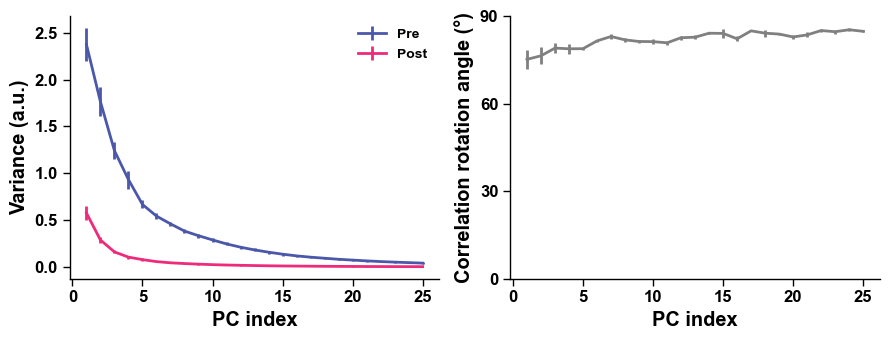

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3.5))

plt.sca(ax[0])
plot(np.arange(1,eigenpicked[i_layer]+1), PC_abs_pre_mean[:eigenpicked[i_layer]].T, PC_abs_pre_se[:eigenpicked[i_layer]].T, color=ryzcolor(0), label="Pre")
plot(np.arange(1,eigenpicked[i_layer]+1), PC_abs_post_mean[:eigenpicked[i_layer]].T, PC_abs_post_se[:eigenpicked[i_layer]].T, color=ryzcolor(1), label="Post")
ax[0].set_ylabel('Variance (a.u.)')
ax[0].set_xlabel('PC index')
#ax[0].set_xscale("log")
# xticks=[1, 2, 5, 10, 20, 50]
# ax[0].set_xticks(xticks)
# ax[0].set_xticklabels([str(i) for i in xticks])
ax[0].legend(loc = "upper right")
ax[0].minorticks_off()


plt.sca(ax[1])
plot(np.arange(1,eigenpicked[i_layer]+1), PCA_rotation_mean[:eigenpicked[i_layer]].T, PCA_rotation_se[:eigenpicked[i_layer]].T, color='gray')
ax[1].set_ylabel('Correlation rotation angle (°)')
ax[1].set_xlabel('PC index')
ax[1].set_ylim([0, 90])
ax[1].set_yticks([0, 30, 60, 90])

plt.savefig('Fig4_2.pdf')